# Programming Exercise 8:
# Anomaly Detection and Recommender Systems


## Introduction 

In this exercise, you will implement the anomaly detection algorithm and
apply it to detect failing servers on a network. In the second part, you will
use collaborative filtering to build a recommender system for movies. Before
starting on the programming exercise, we strongly recommend watching the
video lectures and completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. The assignment can be promptly submitted to the coursera grader directly from this notebook (code and instructions are included below).

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, [`matplotlib`](https://matplotlib.org/) for plotting, and [`scipy`](https://docs.scipy.org/doc/scipy/reference/) for scientific and numerical computation functions and tools.

In [2]:
import numpy as np
from scipy.io import loadmat
from scipy import optimize
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1 Anomaly Detection 

In this exercise, you will implement an anomaly detection algorithm to detect anomalous behavior in server computers. The features measure the throughput (mb/s) and latency (ms) of response of each server. While your servers were operating, you collected $m = 307$ examples of how they were behaving, and thus have an unlabeled dataset $\{x^{(1)}, \dots, x^{(m)}\}$. You suspect that the vast majority of these examples are “normal” (non-anomalous) examples of the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset.

You will use a Gaussian model to detect anomalous examples in your dataset. You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing. On that dataset you will fit a Gaussian distribution and then find values that have very low probability and hence can be considered anomalies. After that, you will apply the anomaly detection algorithm to a larger dataset with many dimensions.

We start this exercise by using a small dataset that is easy to visualize. Our example case consists of 2 network server statistics across several machines: the latency and throughput of each machine. 

In [3]:
#  The following command loads the dataset.
data = loadmat("Data/ex8data1.mat")
X, Xval, yval = data['X'], data['Xval'], data['yval'][:, 0]

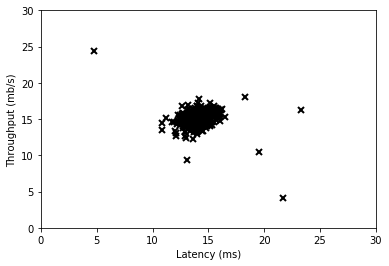

In [4]:
#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bx', mew=2, mec='k', ms=6)
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()